# Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import yfinance as yf

%matplotlib inline

In [2]:
df = yf.download("BTC-USD", start="2014-10-20", end="2024-10-20")
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-14,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056
2024-10-15,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879
2024-10-16,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534
2024-10-17,67617.078125,67912.210938,66647.390625,67399.835938,67399.835938,32790898511
2024-10-18,67419.109375,68969.750000,67177.820312,68418.789062,68418.789062,36857165014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3652 entries, 2014-10-20 to 2024-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3652 non-null   float64
 1   High       3652 non-null   float64
 2   Low        3652 non-null   float64
 3   Close      3652 non-null   float64
 4   Adj Close  3652 non-null   float64
 5   Volume     3652 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 199.7 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03
mean,18349.106250,18763.572716,17909.922077,18366.581027,18366.581027,1.788509e+10
std,19990.169130,20431.923591,19513.772321,20003.297456,20003.297456,1.916663e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,6.491650e+06
25%,1250.644958,1267.507477,1228.062500,1250.795013,1250.795013,4.447643e+08
50%,9273.208984,9431.064453,9118.055176,9277.233887,9277.233887,1.439767e+10
75%,29772.549316,30256.227051,29256.179688,29776.855957,29776.855957,2.886011e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


# Visualization

<Axes: title={'center': 'Bitcoin Adjusted Close Prices'}, xlabel='Date'>

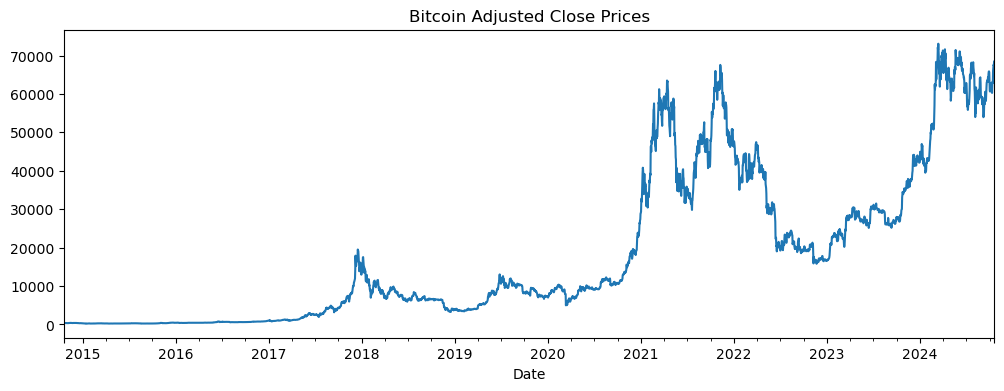

In [6]:
df['Adj Close'].plot(title='Bitcoin Adjusted Close Prices', figsize=(12,4))

# Calculate the rolling mean

In [7]:
df['Adj Close rolling'] = df['Adj Close'].rolling(window=20, min_periods=1).mean()

<Axes: xlabel='Date'>

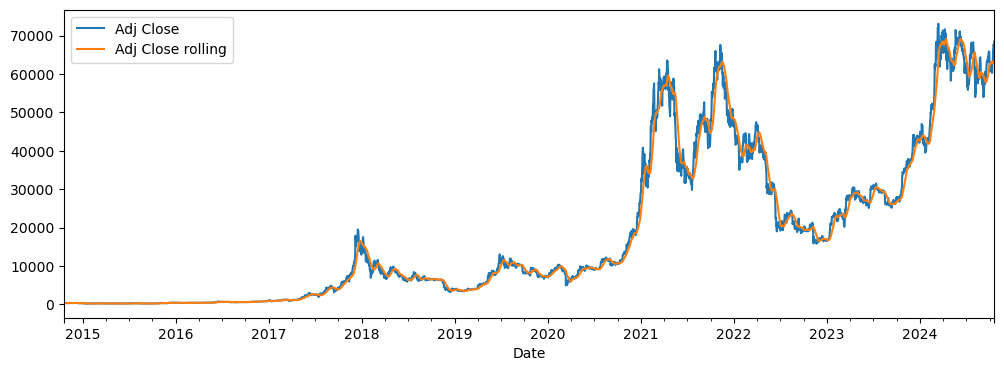

In [8]:
df[['Adj Close','Adj Close rolling']].plot(figsize=(12,4))

Text(0.5, 1.0, 'Histogram of Adjusted Close Prices')

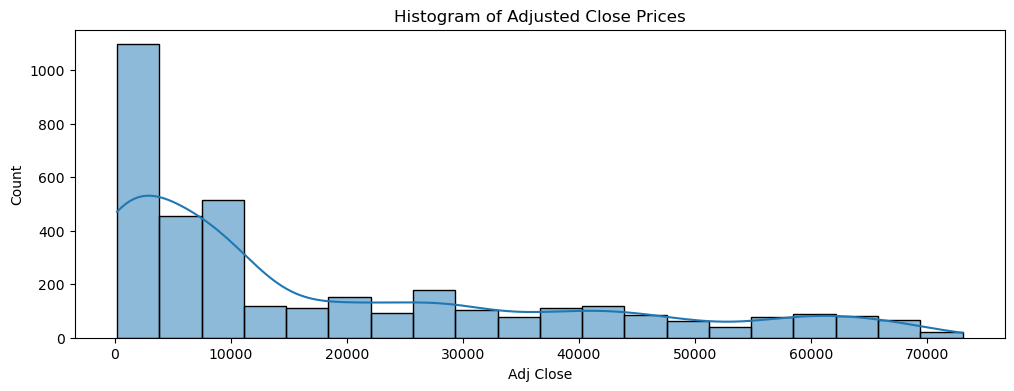

In [9]:
plt.figure(figsize=(12, 4))
sns.histplot(df['Adj Close'], kde=True)
plt.title('Histogram of Adjusted Close Prices')

In [10]:
skewness = df['Adj Close'].skew()
kurtosis = df['Adj Close'].kurtosis()

print(skewness, kurtosis)

1.0680120920950995 -0.06659537878875321


# Check for stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    critical_values = result[4]
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value:  {}'.format(result[1]))
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

adf_test(df['Adj Close'])

ADF Statistic: -0.6610472117895927
p-value:  0.8565828981418473
Critical Values:
   1%: -3.43215622115055
   5%: -2.862338087688428
   10%: -2.5671948344809046


# Differencing

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

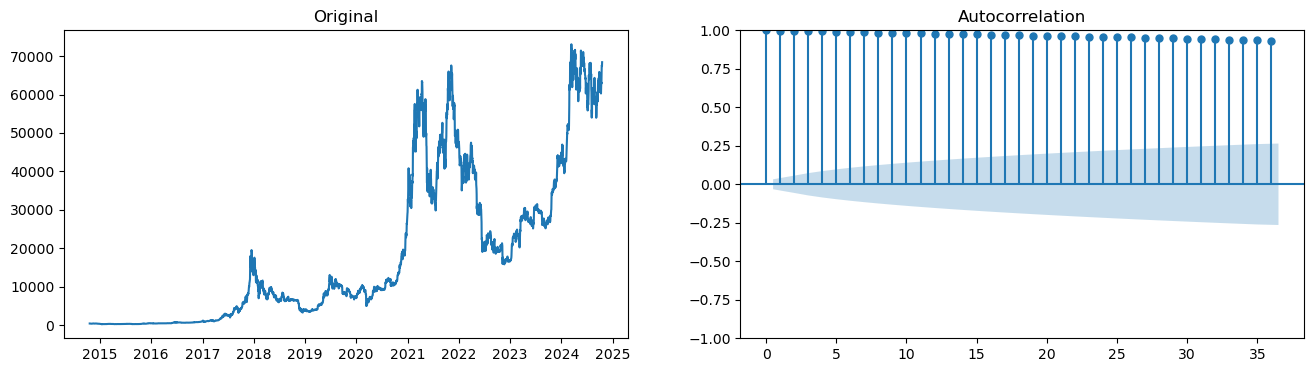

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df['Adj Close'])
ax1.set_title('Original')

plot_acf(df['Adj Close'], ax=ax2);

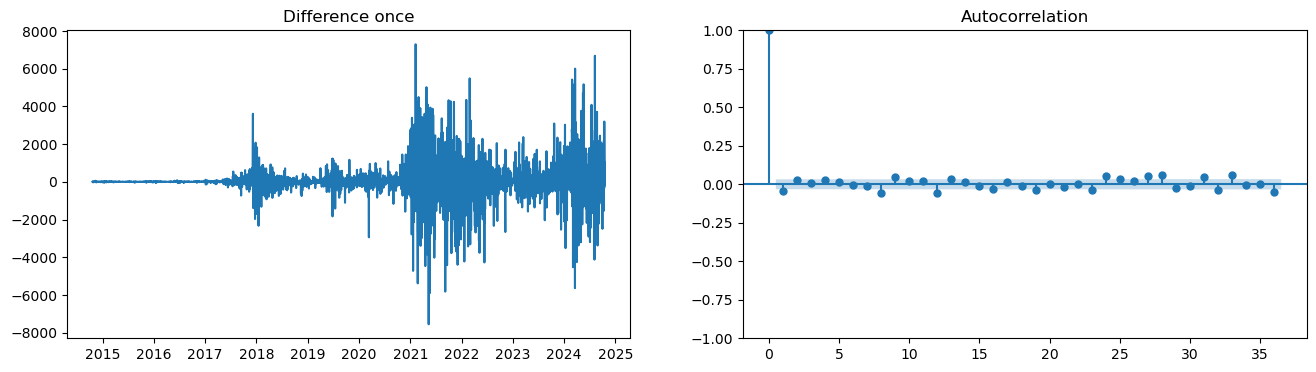

In [15]:
# d term
diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

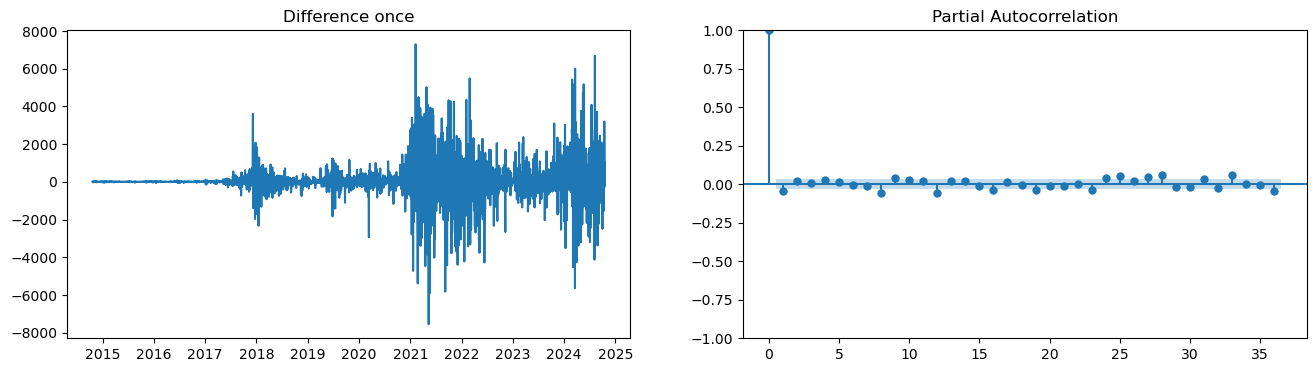

In [16]:
#p term
diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

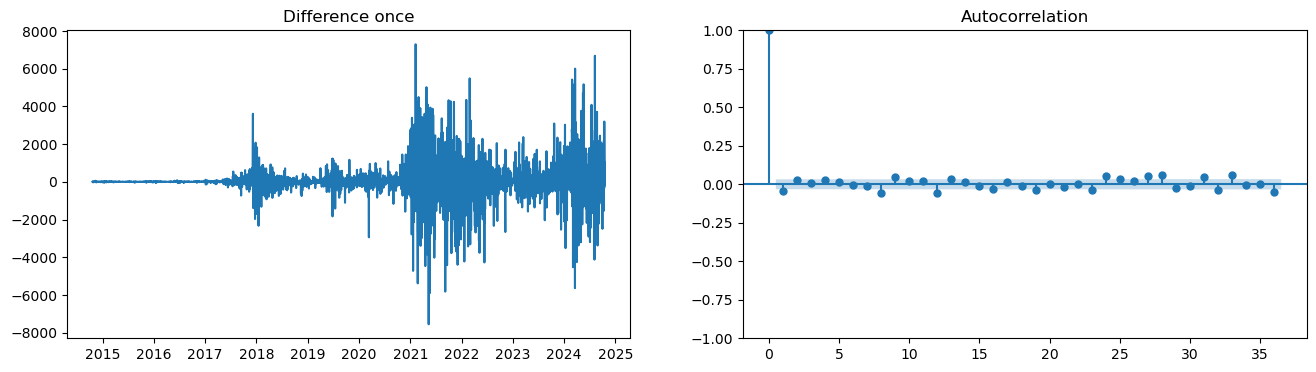

In [17]:
#q term
diff = df['Adj Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [18]:
#df['Adj Close diff']= df['Adj Close'] - df['Adj Close'].shift(1)

In [19]:
df['Adj Close diff']= diff

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close rolling,Adj Close diff
Date,,,,,,,,
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000,382.845001,NaN
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900,384.660004,3.630005
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300,384.159332,-3.317017
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900,377.723747,-24.740997
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700,373.847998,-0.071991


In [21]:
adf_test(df['Adj Close diff'].dropna())

ADF Statistic: -9.354628465025156
p-value:  8.121679574313345e-16
Critical Values:
   1%: -3.432157719082355
   5%: -2.8623387493560006
   10%: -2.5671951867311744


In [22]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Adj Close rolling    0
Adj Close diff       1
dtype: int64

In [23]:
df = df.dropna()

<Axes: title={'center': 'Bitcoin Differenced Adjusted Close Prices'}, xlabel='Date'>

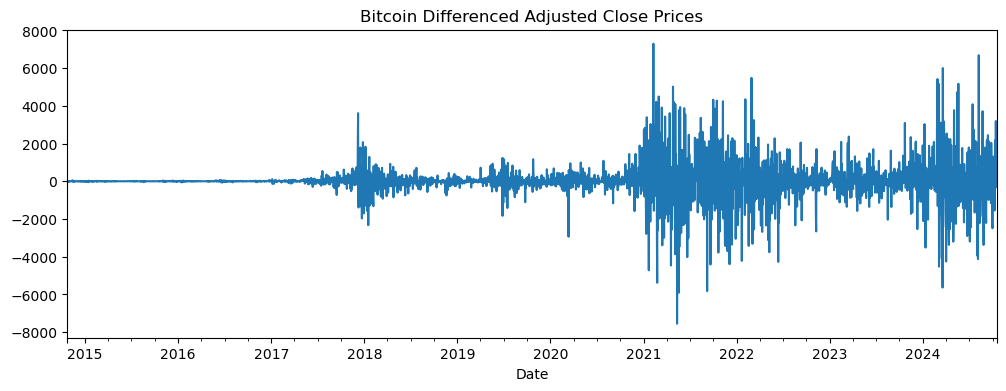

In [24]:
df['Adj Close diff'].plot(title='Bitcoin Differenced Adjusted Close Prices', figsize=(12,4))

# Seasonal Decomposing

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

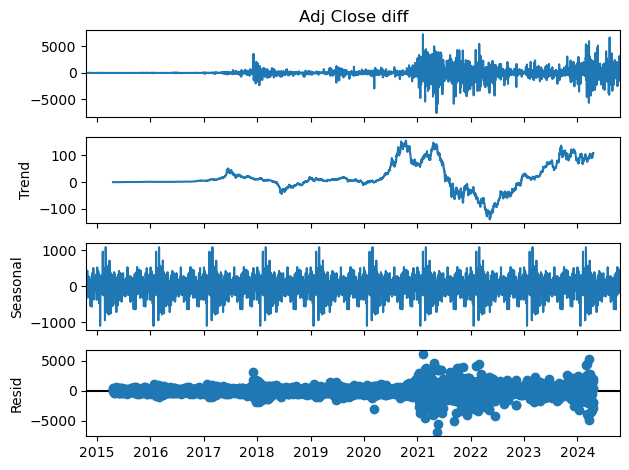

In [26]:
decompose = seasonal_decompose(df['Adj Close diff'], model='additive', period=365)
decompose.plot();

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close rolling,Adj Close diff
Date,,,,,,,,
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900,384.660004,3.630005
2014-10-22,386.118011,388.575989,382.248993,383.157990,383.157990,11641300,384.159332,-3.317017
2014-10-23,382.962006,385.048004,356.446991,358.416992,358.416992,26456900,377.723747,-24.740997
2014-10-24,358.591003,364.345001,353.304993,358.345001,358.345001,15585700,373.847998,-0.071991
2014-10-25,358.610992,359.860992,342.877014,347.270996,347.270996,18127500,369.418498,-11.074005
...,...,...,...,...,...,...,...,...
2024-10-14,62848.398438,66482.492188,62442.152344,66046.125000,66046.125000,43706958056,62896.684961,3194.750000
2024-10-15,66050.367188,67881.679688,64809.195312,67041.109375,67041.109375,48863870879,63091.583203,994.984375
2024-10-16,67042.460938,68375.289062,66758.726562,67612.718750,67612.718750,38195189534,63213.168164,571.609375


# ARIMA Model

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
#ARIMA Model
arima_model = ARIMA(df['Adj Close diff'], order=(1, 0, 0))
arima_fit = arima_model.fit()

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Adj Close diff   No. Observations:                 3651
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -29986.582
Date:                Sun, 20 Oct 2024   AIC                          59979.163
Time:                        08:01:46   BIC                          59997.772
Sample:                    10-21-2014   HQIC                         59985.790
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6349     14.251      1.308      0.191      -9.297      46.567
ar.L1         -0.0458      0.009     -5.191      0.000      -0.063      -0.028
sigma2      7.972e+05   6893.277    115.653      0.0

(array([1.85168414e-07, 9.25842070e-07, 5.36988401e-06, 1.79613362e-05,
        1.38505974e-04, 4.80697203e-04, 2.44422307e-05, 5.55505242e-06,
        2.03685255e-06, 3.70336828e-07]),
 array([-7534.86535002, -6055.68455314, -4576.50375625, -3097.32295937,
        -1618.14216249,  -138.96136561,  1340.21943127,  2819.40022815,
         4298.58102504,  5777.76182192,  7256.9426188 ]),
 <BarContainer object of 10 artists>)

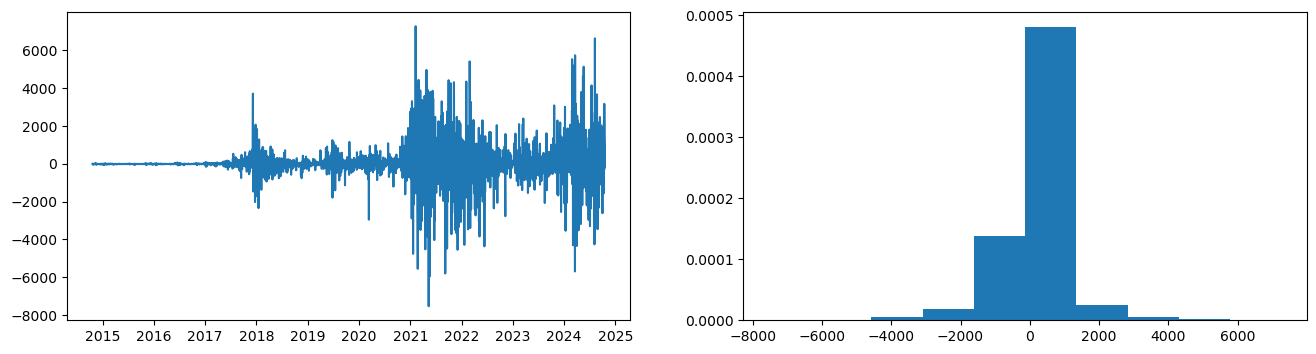

In [31]:
arima_residuals = pd.DataFrame(arima_fit.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(arima_residuals)
ax2.hist(arima_residuals, density = True)

In [32]:
arima_model_1 = ARIMA(df['Adj Close diff'].dropna(), order=(2, 1, 1))  # Adjust the p, d, q values as needed
arima_fit_1 = arima_model_1.fit()

# Print summary of the model
print(arima_fit_1.summary())

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Adj Close diff   No. Observations:                 3651
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -29981.849
Date:                Sun, 20 Oct 2024   AIC                          59971.697
Time:                        08:01:48   BIC                          59996.507
Sample:                    10-21-2014   HQIC                         59980.533
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0445      0.009     -5.096      0.000      -0.062      -0.027
ar.L2          0.0230      0.009      2.535      0.011       0.005       0.041
ma.L1         -1.0000      0.009   -114.611      0.0

In [33]:
# Forecast the next 90 steps
forecast = arima_fit_1.forecast(steps=90)
print("Forecasted values:\n", forecast)

Forecasted values:
 2024-10-19   -31.251312
2024-10-20    43.882239
2024-10-21    16.352119
2024-10-22    19.308253
2024-10-23    18.542643
                ...    
2025-01-12    18.625401
2025-01-13    18.625401
2025-01-14    18.625401
2025-01-15    18.625401
2025-01-16    18.625401
Freq: D, Name: predicted_mean, Length: 90, dtype: float64


# SARIMA Model

In [34]:
sarima_model = SARIMAX(df['Adj Close diff'], order=(2,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Summary of the model
print(sarima_results.summary())

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     Adj Close diff   No. Observations:                 3651
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -29801.017
Date:                            Sun, 20 Oct 2024   AIC                          59614.034
Time:                                    08:02:04   BIC                          59651.206
Sample:                                10-21-2014   HQIC                         59627.277
                                     - 10-18-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0416      0.009     -4.720      0.000      -0.059      -0.024
ar.L2          0.0260      0.009   

(array([3.79804217e-07, 1.70911898e-06, 5.12735693e-06, 1.88003087e-05,
        1.44705407e-04, 4.88428223e-04, 2.58266868e-05, 6.07686747e-06,
        1.70911898e-06, 5.69706325e-07]),
 array([-7338.81273472, -5896.50351291, -4454.19429111, -3011.8850693 ,
        -1569.57584749,  -127.26662569,  1315.04259612,  2757.35181793,
         4199.66103974,  5641.97026154,  7084.27948335]),
 <BarContainer object of 10 artists>)

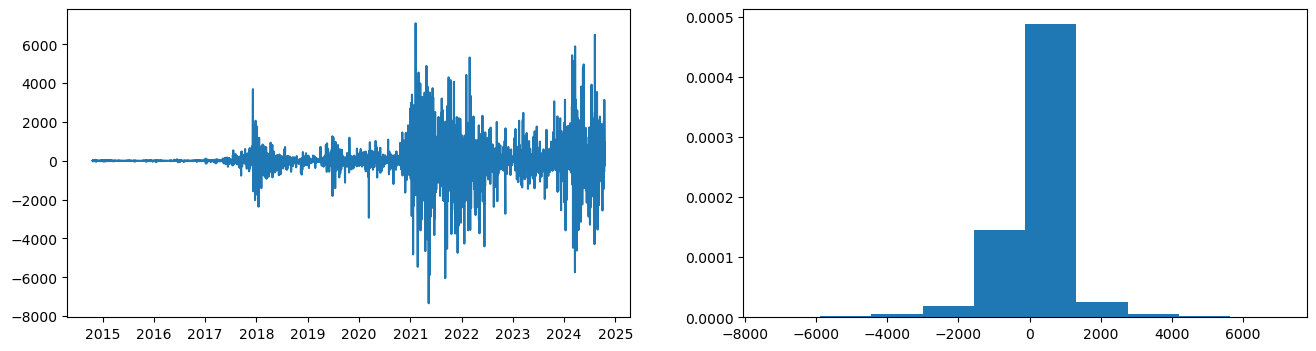

In [35]:
sarima_residuals = pd.DataFrame(sarima_results.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(sarima_residuals)
ax2.hist(sarima_residuals, density = True)

# ARIMAX Model

In [36]:
arimax_model = SARIMAX(df['Adj Close diff'], order=(2,1,1), exog=df['Volume'], enforce_stationarity=False, enforce_invertibility=False)
arimax_results = arimax_model.fit(method='nm', maxiter=500)
print(arimax_results.summary())

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 8.207093
         Iterations: 392
         Function evaluations: 658
                               SARIMAX Results                                
Dep. Variable:         Adj Close diff   No. Observations:                 3651
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -29964.097
Date:                Sun, 20 Oct 2024   AIC                          59938.193
Time:                        08:02:10   BIC                          59969.203
Sample:                    10-21-2014   HQIC                         59949.237
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      -3.42e-09    7.2e-10     -4.753      0.000   -4.83e-09   -

(array([1.84334549e-07, 1.10600729e-06, 5.71437101e-06, 1.91707931e-05,
        1.70509458e-04, 4.45720939e-04, 2.30418186e-05, 5.89870556e-06,
        1.29034184e-06, 3.68669098e-07]),
 array([-7495.26767166, -6009.39557584, -4523.52348002, -3037.6513842 ,
        -1551.77928838,   -65.90719256,  1419.96490326,  2905.83699908,
         4391.7090949 ,  5877.58119072,  7363.45328654]),
 <BarContainer object of 10 artists>)

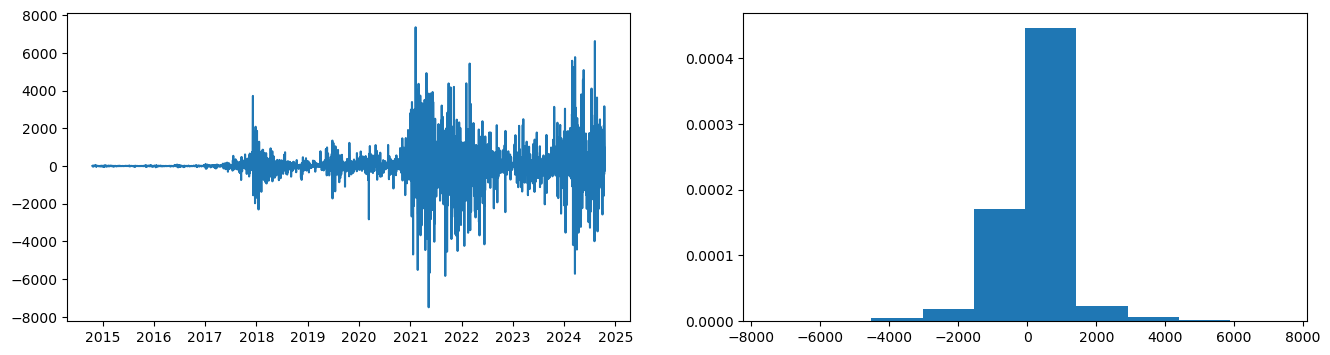

In [37]:
arimax_residuals = pd.DataFrame(arimax_results.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(arimax_residuals)
ax2.hist(arimax_residuals, density = True)

# SARIMAX Model

In [38]:
sarimax_model = SARIMAX(df['Adj Close diff'], order=(2,1,1), seasonal_order=(1, 1, 1, 365), exog=df['Volume'], enforce_stationarity=False, enforce_invertibility=False)
sarimax_results = arimax_model.fit(method='nm', maxiter=500)
print(sarimax_results.summary())

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 8.207093
         Iterations: 392
         Function evaluations: 658
                               SARIMAX Results                                
Dep. Variable:         Adj Close diff   No. Observations:                 3651
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -29964.097
Date:                Sun, 20 Oct 2024   AIC                          59938.193
Time:                        08:02:15   BIC                          59969.203
Sample:                    10-21-2014   HQIC                         59949.237
                         - 10-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      -3.42e-09    7.2e-10     -4.753      0.000   -4.83e-09   -

(array([1.84334549e-07, 1.10600729e-06, 5.71437101e-06, 1.91707931e-05,
        1.70509458e-04, 4.45720939e-04, 2.30418186e-05, 5.89870556e-06,
        1.29034184e-06, 3.68669098e-07]),
 array([-7495.26767166, -6009.39557584, -4523.52348002, -3037.6513842 ,
        -1551.77928838,   -65.90719256,  1419.96490326,  2905.83699908,
         4391.7090949 ,  5877.58119072,  7363.45328654]),
 <BarContainer object of 10 artists>)

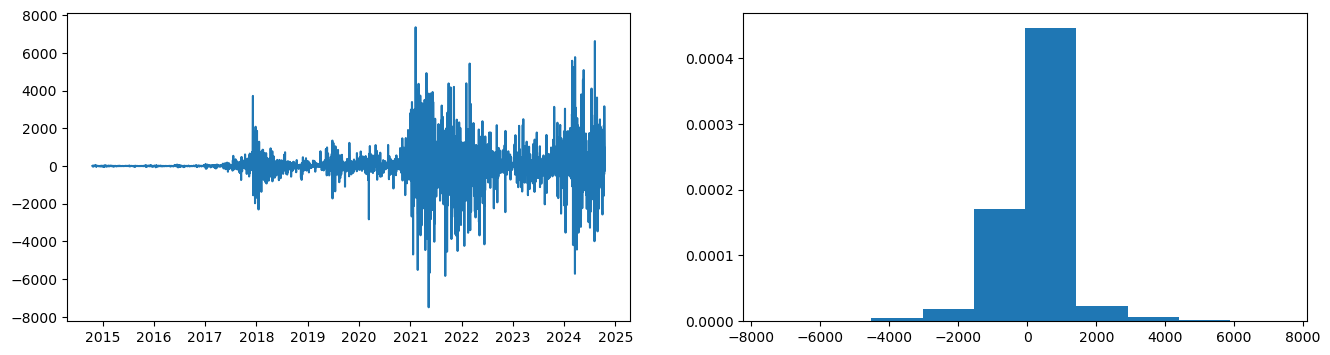

In [39]:
sarimax_residuals = pd.DataFrame(sarimax_results.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(sarimax_residuals)
ax2.hist(sarimax_residuals, density = True)

# ARCH GARCH Model

In [40]:
from arch import arch_model

In [41]:
arch_model_1 = arch_model(sarima_residuals.dropna(), vol='ARCH', p=1)
arch_fit = arch_model_1.fit()
print(arch_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 29201.575765212132
Iteration:      2,   Func. Count:      9,   Neg. LLF: 29201.40812788392
Iteration:      3,   Func. Count:     13,   Neg. LLF: 29200.664087776408
Iteration:      4,   Func. Count:     17,   Neg. LLF: 29198.805632443808
Iteration:      5,   Func. Count:     21,   Neg. LLF: 29198.6579258733
Iteration:      6,   Func. Count:     25,   Neg. LLF: 29198.657924750965
Iteration:      7,   Func. Count:     29,   Neg. LLF: 29198.657924725885
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29198.657924632364
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Lik

C:\Users\Legion\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.962e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


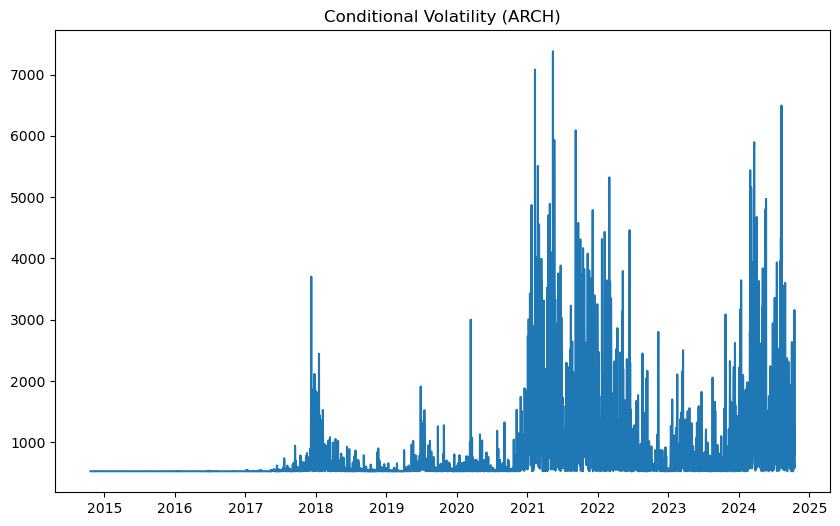

In [42]:
# Plot conditional volatility (variance from the ARCH model)
plt.figure(figsize=(10,6))
plt.plot(arch_fit.conditional_volatility)
plt.title('Conditional Volatility (ARCH)')
plt.show()

In [43]:
scaled_residuals = sarima_residuals.dropna() * 0.01

# Fit GARCH(1,1) model again with rescaled residuals
garch_model = arch_model(scaled_residuals, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Print the new summary
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2357207.612750367
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4296357.435392453
Iteration:      3,   Func. Count:     19,   Neg. LLF: 9460.472726663347
Iteration:      4,   Func. Count:     24,   Neg. LLF: 19467.524284633015
Iteration:      5,   Func. Count:     38,   Neg. LLF: 16728.67455372504
Iteration:      6,   Func. Count:     48,   Neg. LLF: 14623.470985733587
Iteration:      7,   Func. Count:     54,   Neg. LLF: 8519.098725028312
Iteration:      8,   Func. Count:     59,   Neg. LLF: 55456.36137408326
Iteration:      9,   Func. Count:     65,   Neg. LLF: 8885.2925104487
Iteration:     10,   Func. Count:     71,   Neg. LLF: 8422.721524830224
Iteration:     11,   Func. Count:     76,   Neg. LLF: 8416.215120896319
Iteration:     12,   Func. Count:     82,   Neg. LLF: 8314.653529230363
Iteration:     13,   Func. Count:     87,   Neg. LLF: 8323.88783065894
Iteration:     14,   Func. Count:     93,   Neg. LLF: 8298.303928

C:\Users\Legion\anaconda3\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


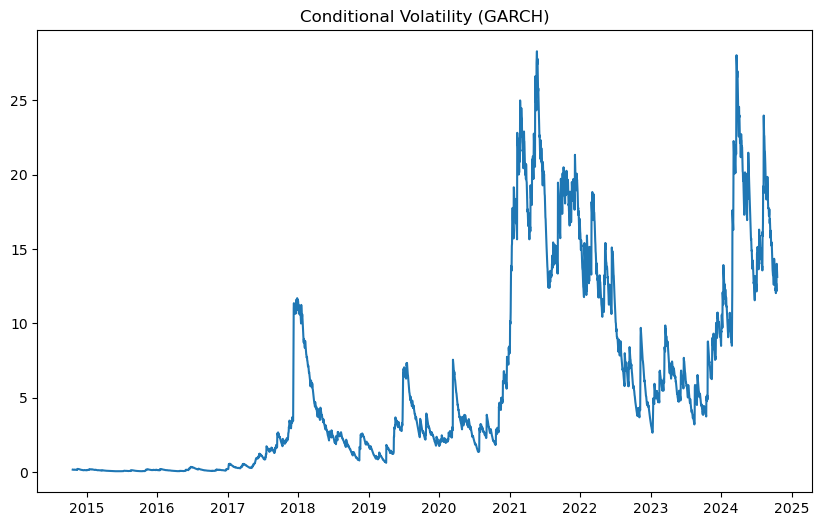

In [44]:
# Plot conditional volatility (conditional variance from the GARCH model)
plt.figure(figsize=(10,6))
plt.plot(garch_fit.conditional_volatility)
plt.title('Conditional Volatility (GARCH)')
plt.show()

In [45]:
# Compare AIC and BIC values
print(f"ARIMA AIC: {arima_fit_1.aic}, BIC: {arima_fit_1.bic}")
print(f"SARIMA AIC: {sarima_results.aic}, BIC: {sarima_results.bic}")
print(f"GARCH AIC: {garch_fit.aic}, BIC: {garch_fit.bic}")

ARIMA AIC: 59971.69748444603, BIC: 59996.507414232336
SARIMA AIC: 59614.034218643304, BIC: 59651.20622064628
GARCH AIC: 16580.189316675653, BIC: 16605.000342202275


# Forecast for Univariate Model

In [46]:
forecast = garch_fit.forecast(horizon=90)  # Use horizon instead of steps for clarity
print("Forecasted values:\n", forecast.variance[-1:]) 

Forecasted values:
                   h.01        h.02        h.03        h.04       h.05  \
Date                                                                    
2024-10-18  167.330721  167.389515  167.448329  167.507164  167.56602   

                  h.06        h.07        h.08       h.09        h.10  ...  \
Date                                                                   ...   
2024-10-18  167.624897  167.683794  167.742711  167.80165  167.860609  ...   

                  h.81        h.82       h.83        h.84       h.85  \
Date                                                                   
2024-10-18  172.099996  172.160462  172.22095  172.281459  172.34199   

                  h.86        h.87        h.88        h.89       h.90  
Date                                                                   
2024-10-18  172.402541  172.463114  172.523708  172.584324  172.64496  

[1 rows x 90 columns]


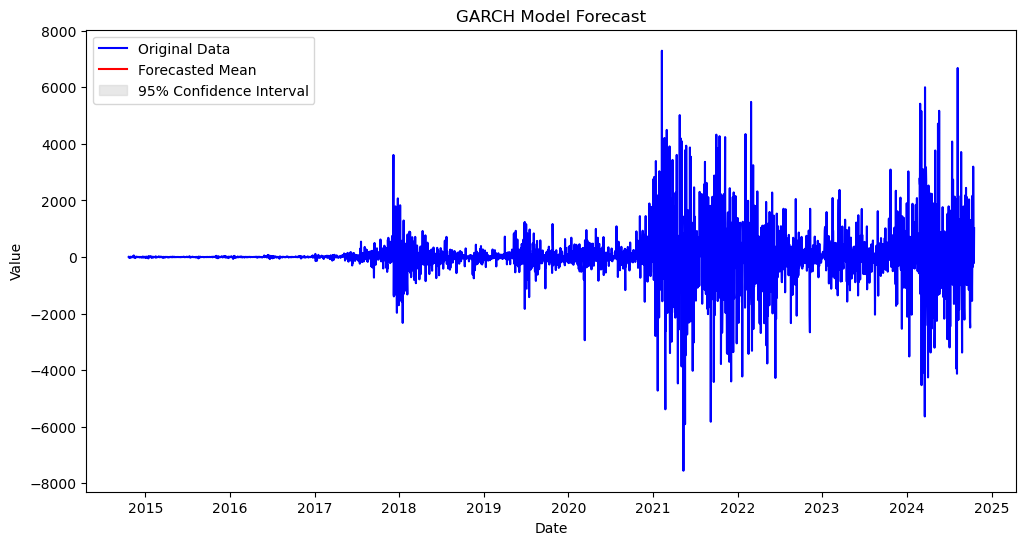

In [47]:
# Forecasting
forecast = garch_fit.forecast(horizon=90)

# Get forecasted mean and variance
forecasted_mean = forecast.mean.iloc[-1]  # Get the last forecasted mean
forecasted_variance = forecast.variance.iloc[-1]  # Get the last forecasted variance

# Prepare for plotting
forecast_index = pd.date_range(start=df['Adj Close diff'].index[-1] + pd.Timedelta(days=1), periods=90)
forecasted_series = pd.Series(forecasted_mean, index=forecast_index)
forecasted_variance_series = pd.Series(np.sqrt(forecasted_variance), index=forecast_index)

# Plotting the forecast
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(df['Adj Close diff'].index, df['Adj Close diff'], label='Original Data', color='blue')

# Plot the forecasted mean
plt.plot(forecasted_series.index, forecasted_series, label='Forecasted Mean', color='red')

# Plot the forecasted variance
plt.fill_between(forecasted_variance_series.index,
                 forecasted_series - 1.96 * forecasted_variance_series,
                 forecasted_series + 1.96 * forecasted_variance_series,
                 color='lightgrey', alpha=0.5, label='95% Confidence Interval')

plt.title('GARCH Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# VAR Model

In [48]:
from statsmodels.tsa.api import VAR

In [49]:
var_data = df[['Adj Close', 'Volume']]
var_data.head()

,Adj Close,Volume
Date,,
2014-10-21,386.475006,14188900
2014-10-22,383.157990,11641300
2014-10-23,358.416992,26456900
2014-10-24,358.345001,15585700
2014-10-25,347.270996,18127500


In [50]:
var_data.isnull().sum()

Adj Close    0
Volume       0
dtype: int64

In [51]:
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

# Check stationarity for each column
for column in var_data.columns:
    print(f"\nChecking stationarity for {column}:")
    check_stationarity(var_data[column])


Checking stationarity for Adj Close:
ADF Statistic: -0.6614833720540626
p-value: 0.8564756106422149
Series is not stationary

Checking stationarity for Volume:
ADF Statistic: -2.4205406588468947
p-value: 0.13602268463823647
Series is not stationary


In [52]:
var_data_diff = var_data.diff().dropna()  # Take the first difference to make it stationary

In [53]:
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

# Check stationarity for each column
for column in var_data.columns:
    print(f"\nChecking stationarity for {column}:")
    check_stationarity(var_data_diff[column])


Checking stationarity for Adj Close:
ADF Statistic: -9.3533684995717
p-value: 8.181931954859333e-16
Series is stationary

Checking stationarity for Volume:
ADF Statistic: -15.884566817509425
p-value: 8.680048670332256e-29
Series is stationary


In [54]:
var_data = var_data_diff # Take the first difference to make it stationary

In [55]:
model = VAR(var_data)
lag_order = model.select_order(maxlags=15)  # Automatically select the best lag
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        59.67       59.68   8.231e+25       59.67
1        59.53       59.54   7.153e+25       59.54
2        59.43       59.45   6.450e+25       59.43
3        59.39       59.42   6.222e+25       59.40
4        59.38       59.41   6.130e+25       59.39
5        59.31       59.35   5.754e+25       59.33
6        59.29       59.33   5.598e+25       59.30
7        59.28       59.33   5.567e+25       59.30
8        59.28       59.34   5.550e+25       59.30
9        59.27       59.34   5.527e+25       59.30
10       59.27       59.34   5.521e+25       59.30
11       59.27       59.35   5.511e+25       59.30
12       59.26       59.34   5.428e+25       59.29
13       59.23      59.32*   5.295e+25       59.26
14       59.23       59.33   5.286e+25       59.26
15      59.22*       59.33  5.251e+25*      59.26*
-------------------------------

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [56]:
var_model = model.fit(lag_order.aic)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Oct, 2024
Time:                     08:02:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    59.3287
Nobs:                     3635.00    HQIC:                   59.2606
Log likelihood:          -117891.    FPE:                5.25059e+25
AIC:                      59.2230    Det(Omega_mle):     5.16217e+25
--------------------------------------------------------------------
Results for equation Adj Close
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                17.854659        14.679783            1.216           0.224
L1.Adj Close         -0.027045         0.016657           -1.624           0.104
L1.Volume             0.000000         0.000000         

# L Jungbox Test

In [57]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [58]:
lb_test_adj_close = acorr_ljungbox(var_model.resid['Adj Close'], lags=[10], return_df=True)
lb_test_volume = acorr_ljungbox(var_model.resid['Volume'], lags=[10], return_df=True)

print("\nLjung-Box Test for Adj Close Residuals:\n", lb_test_adj_close)
print("\nLjung-Box Test for Volume Residuals:\n", lb_test_volume)


Ljung-Box Test for Adj Close Residuals:
      lb_stat  lb_pvalue
10  0.517429   0.999992

Ljung-Box Test for Volume Residuals:
      lb_stat  lb_pvalue
10  1.840254   0.997424


# Jarque Bera Test

In [59]:
from statsmodels.stats.stattools import jarque_bera

In [60]:
jb_test_adj_close = jarque_bera(var_model.resid['Adj Close'])
jb_test_volume = jarque_bera(var_model.resid['Volume'])

print("\nJarque-Bera Test for Adj Close Residuals:\n", jb_test_adj_close)
print("\nJarque-Bera Test for Volume Residuals:\n", jb_test_volume)


Jarque-Bera Test for Adj Close Residuals:
 (20753.924349946472, 0.0, 0.020490793723470607, 14.705793713002345)

Jarque-Bera Test for Volume Residuals:
 (18827678.436190546, 0.0, 10.144585506598515, 354.9909703438127)


# Granger Causality Tests

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger causality test
max_lag = 15  # Use the lag order determined earlier

granger_test_results = grangercausalitytests(var_data_diff[['Adj Close', 'Volume']], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6674  , p=0.1967  , df_denom=3646, df_num=1
ssr based chi2 test:   chi2=1.6688  , p=0.1964  , df=1
likelihood ratio test: chi2=1.6684  , p=0.1965  , df=1
parameter F test:         F=1.6674  , p=0.1967  , df_denom=3646, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.0419  , p=0.0001  , df_denom=3643, df_num=2
ssr based chi2 test:   chi2=18.1086 , p=0.0001  , df=2
likelihood ratio test: chi2=18.0638 , p=0.0001  , df=2
parameter F test:         F=9.0419  , p=0.0001  , df_denom=3643, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.3573  , p=0.0000  , df_denom=3640, df_num=3
ssr based chi2 test:   chi2=28.1258 , p=0.0000  , df=3
likelihood ratio test: chi2=28.0179 , p=0.0000  , df=3
parameter F test:         F=9.3573  , p=0.0000  , df_denom=3640, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.3376  , p=0.

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


# Forecast

In [62]:
forecast_steps = 10  # Forecast 10 steps ahead
forecast_values = var_model.forecast(var_data_diff.values[-lag_order.aic:], steps=forecast_steps)

# Convert the forecasted values into a dataframe
forecast_index = pd.date_range(start=var_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(forecast_values, index=forecast_index, columns=var_data.columns)

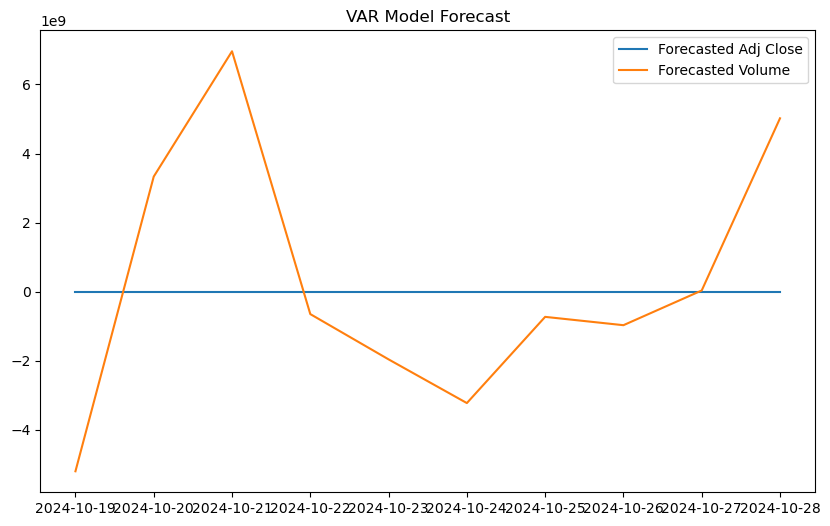

In [63]:
plt.figure(figsize=(10, 6))
for column in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[column], label=f"Forecasted {column}")
plt.title('VAR Model Forecast')
plt.legend()
plt.show()

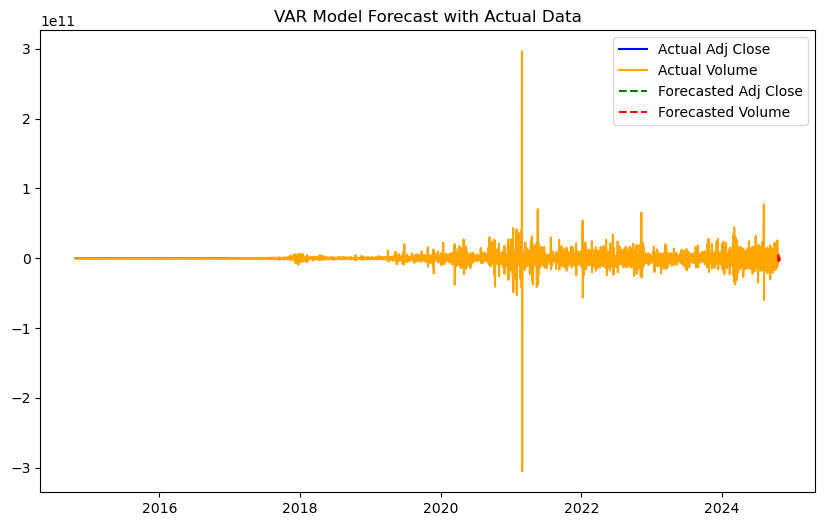

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(var_data.index, var_data['Adj Close'], label='Actual Adj Close', color='blue')
plt.plot(var_data.index, var_data['Volume'], label='Actual Volume', color='orange')

plt.plot(forecast_df.index, forecast_df['Adj Close'], label='Forecasted Adj Close', linestyle='dashed', color='green')
plt.plot(forecast_df.index, forecast_df['Volume'], label='Forecasted Volume', linestyle='dashed', color='red')

plt.title('VAR Model Forecast with Actual Data')
plt.legend()
plt.show()